# Bike Sharing Assignmnet - Solution


### The steps we will follow in this exercise are as follows;
1. Reading, understanding and visualising the data
2. Preparing the data for modelling (train-test split, rescallin etc.)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

## Step 1. Reading, understanding and visualising the data


In [127]:
#pip install matplotlib==3.7.3

In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [486]:
# read the data
df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [487]:
df_bike.shape

(730, 16)

In [488]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [489]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [490]:
#Cleaning 
# - removing 'dteday' - as yr and mnth is already captured
# - removing 'casual', 'registered', 'instant' - as these are not features
# - removing 'temp' - as we are considering atemp which is the temp that people feel on ground

df_bike = df_bike.drop(['dteday', 'casual', 'registered', 'instant', 'temp'], axis=1)

In [491]:
df_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [492]:
df_bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,8714.000000


In [493]:
# checking if any column has null values
df_bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [494]:
# Find how the relation is between Cnt and other variable. Is there a linear relation?
# Find multiple linearity i.e. any variable has high co-linearity with other variables

In [495]:
df_bike_int = df_bike[['atemp','hum','windspeed','cnt']]

In [496]:
df_bike_int.head()

,atemp,hum,windspeed,cnt
0,18.18125,80.5833,10.749882,985
1,17.68695,69.6087,16.652113,801
2,9.47025,43.7273,16.636703,1349
3,10.60610,59.0435,10.739832,1562
4,11.46350,43.6957,12.522300,1600


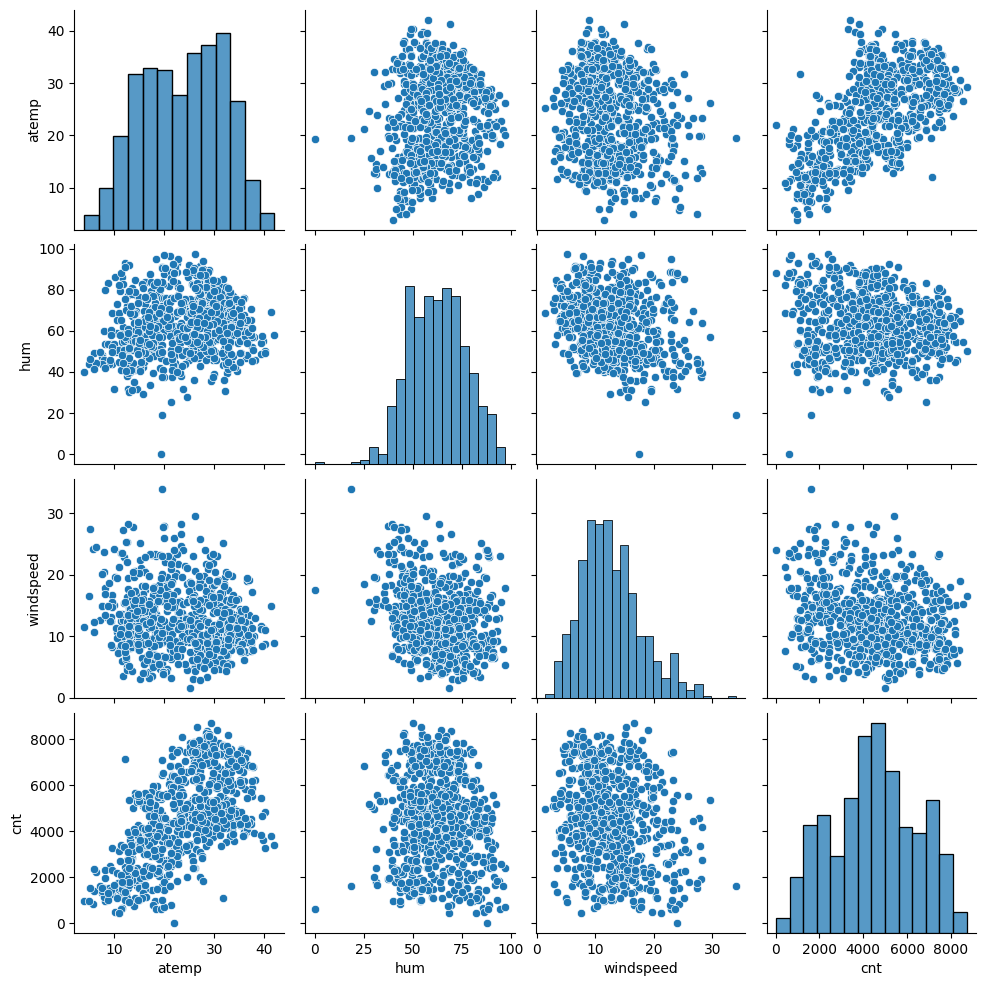

In [497]:
# visualising numeric variables
sns.pairplot(df_bike_int)
plt.show()

#### Observation from pair-plot among the numerical variable:
‘atemp’ (feeling temperature in Celsius) has the highest correlation with the target variable ‘cnt’

In [502]:
df_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [503]:
# visualising categorical variables
# categorical variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

<Axes: xlabel='weathersit', ylabel='cnt'>

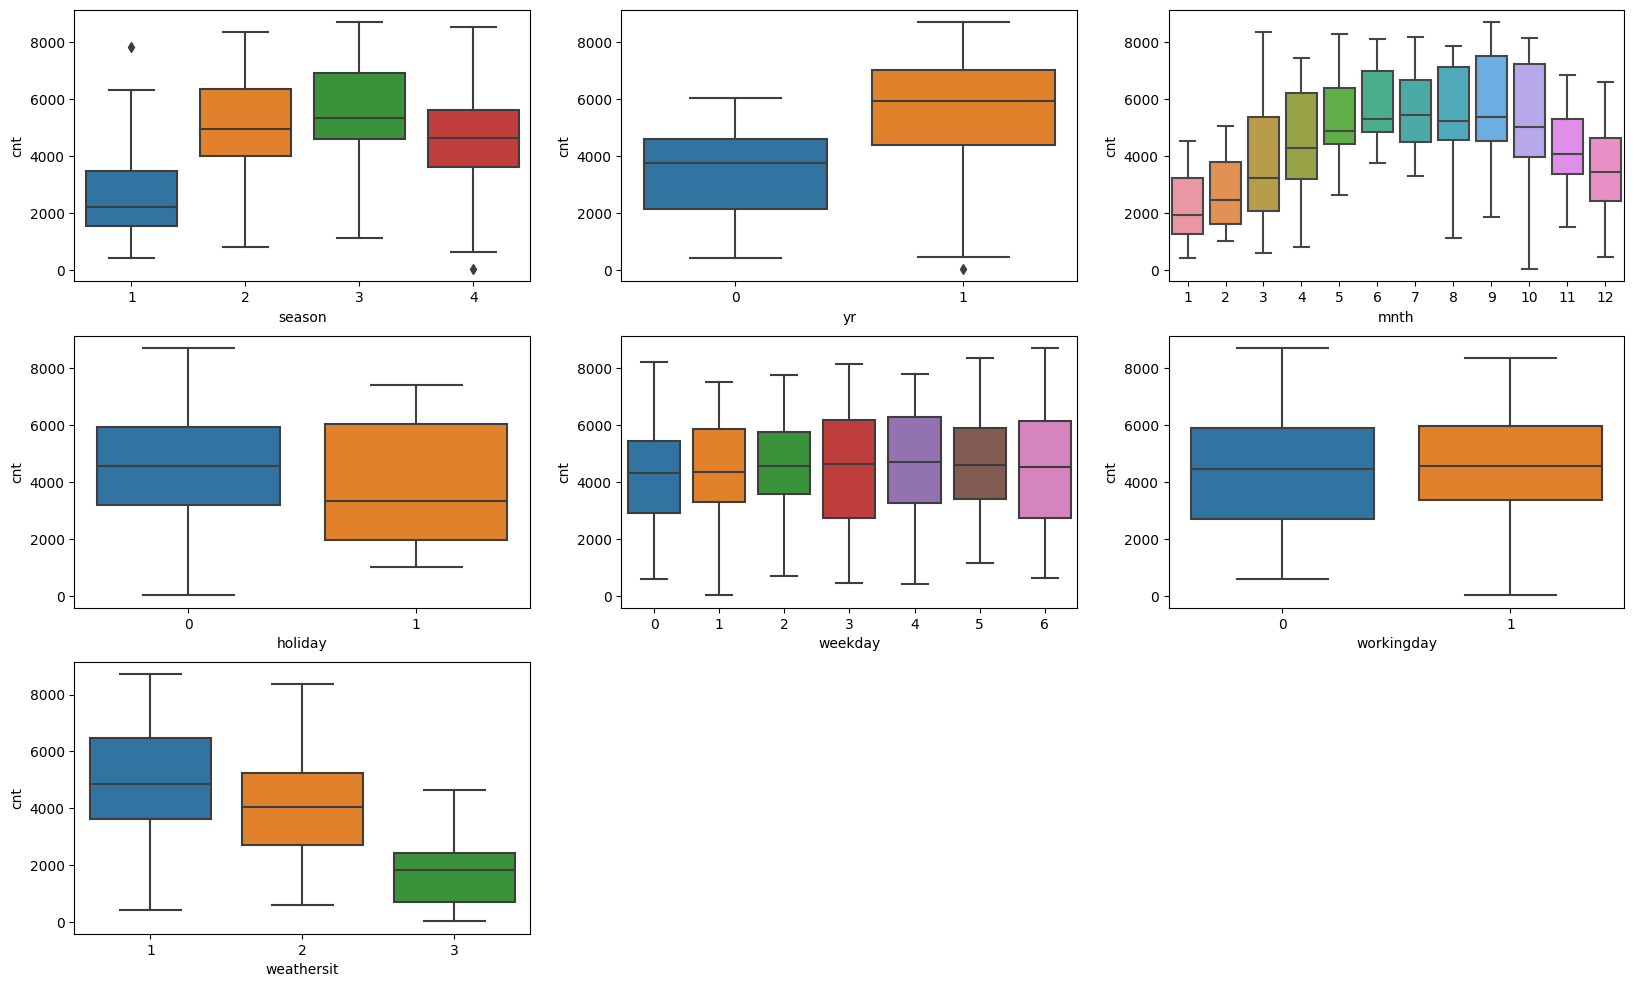

In [504]:
# visualising categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',  y='cnt', data=df_bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr',  y='cnt', data=df_bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',  y='cnt', data=df_bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',  y='cnt', data=df_bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',  y='cnt', data=df_bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',  y='cnt', data=df_bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',  y='cnt', data=df_bike)

#### Observation from boxplot among the categorical variable:
1.	For ‘Season’: ‘2:summer’, ‘3:fall’ - there has been increase in total number of bike rentals
2.	For Year 2019 - there has been increase in total number of bike rentals
3.	On holidays - count of bike rentals have increased
4.	For Month 4-10 - count of bike rentals have increased
5.	Bike rental count has increased for weathersit ‘Clear, Few clouds, Partly cloudy’, ‘Partly cloudy’


## Step 2. Preparing the data for modelling (train-test split, rescallin etc.)
- Encoding:
  - converting binary vars to 1/0  -- not needed to be done for this dataset
  - other categorical vars to dummy vars
- Splitting into train and test
- Rescaling of variables


In [505]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


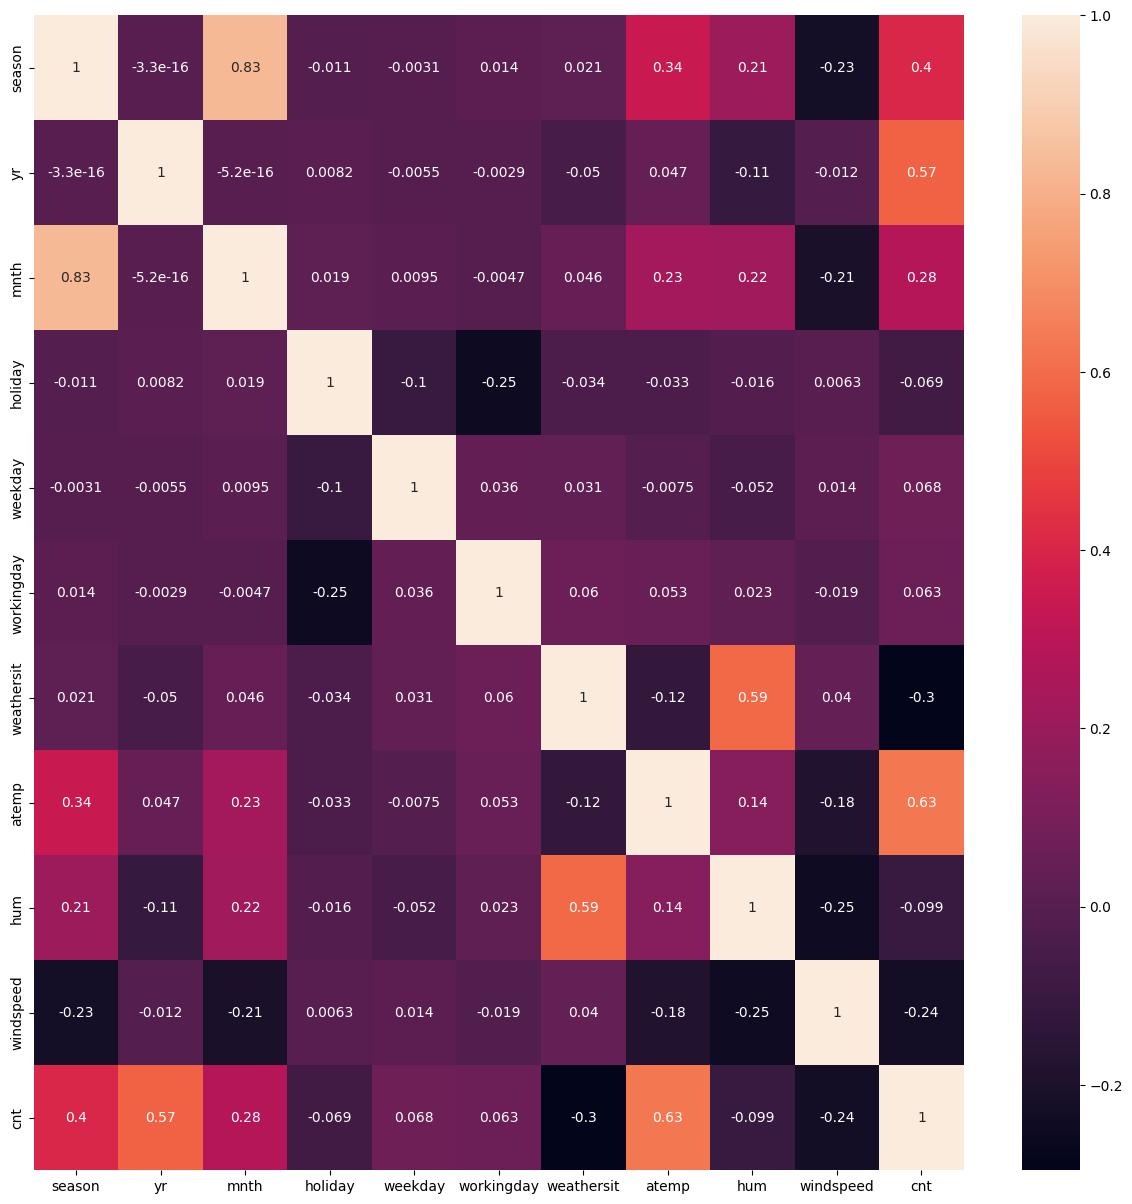

In [506]:
plt.figure(figsize=(15,15))
sns.heatmap(df_bike.corr(), annot=True)
plt.show()

In [507]:
# create dummy variables for [season, mnth, weekday, weathersit]

In [508]:
df_bike.mnth = df_bike.mnth.map({1: 'Jan', 2: 'Feb',3: 'Mar', 4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})
df_bike.season = df_bike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'MistyCloudy', 
                                             3:'LightSnowLightRain',4:'HeavyRainIcePallets'})
df_bike.weekday = df_bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [509]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,MistyCloudy,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,MistyCloudy,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


In [510]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'df_dummy'
df_dummy = df_bike[['season','mnth','weekday','weathersit']]
df_dummy = pd.get_dummies(df_dummy,drop_first=True, dtype=np.uint8)
# Adding the dummy variables to the original dataset
df_bike = pd.concat([df_dummy,df_bike],axis = 1)

In [511]:
# Drop season weathersit mnth weekday as we have created the dummies for it
df_bike.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)

In [512]:
df_bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_LightSnowLightRain,weathersit_MistyCloudy,yr,holiday,workingday,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,11.46350,43.6957,12.522300,1600


In [513]:
df_bike.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_LightSnowLightRain',
       'weathersit_MistyCloudy', 'yr', 'holiday', 'workingday', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

#### Splitting into train and test


In [514]:
df_train, df_test = train_test_split(df_bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


#### Rescaling the features


In [515]:
# 1. instantiate an object
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_LightSnowLightRain,weathersit_MistyCloudy,yr,holiday,workingday,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.318819,0.751824,0.380981,0.191095


In [516]:
df_train[num_vars].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.513156,0.650480,0.320883,0.513499
std,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.529718,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [517]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Step 3. Training the model


### Approach - Recursive Feature Elemination (RFE)
Adding all variable together to the model - using Stats Model

In [518]:
df_bike.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_LightSnowLightRain',
       'weathersit_MistyCloudy', 'yr', 'holiday', 'workingday', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [519]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(510, 28)
(510,)
(220, 28)
(220,)


In [520]:
# add another variable
# add a constant
X_train_sm = sm.add_constant(X_train)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.07e-179
Time:                        21:58:48   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2594      0.035      7.397      0.000       0.190       0.328
season_Spring                    -0.0519      0.030     -1.724      0.085      -0.111       0.007
season_Summer                     0.0348      0.026      1.327      0.185      -0.017       0.086
season_Winter                     0.1015      0.028      3.612      0.000       0.046       0.157
mnth_Aug                          0.0419      0.033      1.257      0.209      -0.024       0.107
mnth_Dec                         -0.0526      0.034     -1.560      0.120      -0.119       0.014
mnth_Feb                         -0.0404      0.033     -1.221      0.223      -0.105       0.025
mnth_Jan                         -0.0736      0.034     -2.188      0.029      -0.140      -0.007
mnth_Jul                         -0.0147      0.035     -0.424      0.672      -0.083       0.053
mnth_Jun                          0.0242      0.024      1.000      0.318      -0.023       0.072
mnth_Mar                         -0.0003      0.025     -0.014      0.989      -0.049       0.048
mnth_May                          0.0363      0.021      1.734      0.084      -0.005       0.077
mnth_Nov                         -0.0457      0.037     -1.249      0.212      -0.118       0.026
mnth_Oct                          0.0076      0.036      0.210      0.833      -0.063       0.079
mnth_Sep                          0.0957      0.032      2.984      0.003       0.033       0.159
weekday_Monday                   -0.0263      0.015     -1.702      0.089      -0.057       0.004
weekday_Saturday                  0.0961      0.014      6.934      0.000       0.069       0.123
weekday_Sunday                    0.0417      0.014      2.964      0.003       0.014       0.069
weekday_Thrusday                 -0.0131      0.016     -0.835      0.404      -0.044       0.018
weekday_Tuesday                  -0.0214      0.016     -1.368      0.172      -0.052       0.009
weekday_Wednesday                -0.0082      0.015     -0.545      0.586      -0.038       0.021
weathersit_LightSnowLightRain    -0.2530      0.027     -9.497      0.000      -0.305      -0.201
weathersit_MistyCloudy           -0.0612      0.010     -5.830      0.000      -0.082      -0.041
yr                                0.2344      0.008     28.934      0.000       0.218       0.250
holiday                           0.0212      0.024      0.882      0.378      -0.026       0.068
workingday                        0.1004      0.012      8.176      0.000       0.076       0.124
atemp                             0.4160      0.045      9.174      0.000       0.327       0.505
hum                              -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed                        -0.1683     

##### We could have below situations:
- High p-value , High VIF  -- Remove
- High-Low:
   - High p, Low VIF - first we will remove these variables and generate model again to see if there is impact on VIF due to removal for this variable
   - Low p, High VIG - remove these after the one above
- Low p-value, Low VIF -- Keep

 Singificance of variable i.e. p-value - low value means high significance .. value should be < 0.05
VIF - how collenier a variable is with outher variable - should have value < 5


In [521]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
24,workingday,83.16
15,weekday_Saturday,19.32
16,weekday_Sunday,17.99
0,season_Spring,10.70
2,season_Winter,9.41
1,season_Summer,8.20
11,mnth_Nov,6.76
12,mnth_Oct,6.47
3,mnth_Aug,6.18
25,atemp,5.93


In [522]:
# removing 'mnth_Mar' with high p-value
X = X_train.drop('mnth_Mar' , axis=1)

In [523]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.03e-180
Time:                        21:59:33   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     483   BIC:                            -878.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2592      0.033      7.897      0.000       0.195       0.324
season_Spring                    -0.0521      0.028     -1.829      0.068      -0.108       0.004
season_Summer                     0.0349      0.026      1.356      0.176      -0.016       0.085
season_Winter                     0.1014      0.028      3.679      0.000       0.047       0.156
mnth_Aug                          0.0420      0.031      1.348      0.178      -0.019       0.103
mnth_Dec                         -0.0523      0.026     -2.008      0.045      -0.104      -0.001
mnth_Feb                         -0.0400      0.022     -1.791      0.074      -0.084       0.004
mnth_Jan                         -0.0732      0.022     -3.285      0.001      -0.117      -0.029
mnth_Jul                         -0.0145      0.033     -0.443      0.658      -0.079       0.050
mnth_Jun                          0.0243      0.023      1.071      0.285      -0.020       0.069
mnth_May                          0.0364      0.019      1.869      0.062      -0.002       0.075
mnth_Nov                         -0.0454      0.031     -1.468      0.143      -0.106       0.015
mnth_Oct                          0.0079      0.031      0.255      0.799      -0.053       0.069
mnth_Sep                          0.0958      0.029      3.308      0.001       0.039       0.153
weekday_Monday                   -0.0263      0.015     -1.704      0.089      -0.057       0.004
weekday_Saturday                  0.0961      0.013      7.162      0.000       0.070       0.122
weekday_Sunday                    0.0417      0.014      3.030      0.003       0.015       0.069
weekday_Thrusday                 -0.0131      0.016     -0.837      0.403      -0.044       0.018
weekday_Tuesday                  -0.0214      0.016     -1.369      0.172      -0.052       0.009
weekday_Wednesday                -0.0082      0.015     -0.546      0.586      -0.038       0.021
weathersit_LightSnowLightRain    -0.2530      0.027     -9.506      0.000      -0.305      -0.201
weathersit_MistyCloudy           -0.0612      0.010     -5.836      0.000      -0.082      -0.041
yr                                0.2344      0.008     28.964      0.000       0.218       0.250
holiday                           0.0211      0.024      0.887      0.376      -0.026       0.068
workingday                        0.1003      0.012      8.481      0.000       0.077       0.124
atemp                             0.4161      0.045      9.312      0.000       0.328       0.504
hum                              -0.1459      0.039     -3.778      0.000      -0.222      -0.070
windspeed                        -0.1683      0.026     -6.507      0.000      -0.219      -0.117
=============================================

In [524]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
23,workingday,72.78
14,weekday_Saturday,16.88
15,weekday_Sunday,15.88
0,season_Spring,9.57
2,season_Winter,9.08
1,season_Summer,7.90
24,atemp,5.77
3,mnth_Aug,5.42
7,mnth_Jul,4.89
10,mnth_Nov,4.85


In [525]:
# removing 'mnth_Oct' with high p-value
X = X.drop('mnth_Oct' , axis=1)

In [526]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.00e-181
Time:                        21:59:49   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     484   BIC:                            -884.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2609      0.032      8.134      0.000       0.198       0.324
season_Spring                    -0.0536      0.028     -1.924      0.055      -0.108       0.001
season_Summer                     0.0324      0.024      1.364      0.173      -0.014       0.079
season_Winter                     0.1047      0.024      4.301      0.000       0.057       0.153
mnth_Aug                          0.0389      0.029      1.357      0.175      -0.017       0.095
mnth_Dec                         -0.0570      0.018     -3.108      0.002      -0.093      -0.021
mnth_Feb                         -0.0413      0.022     -1.902      0.058      -0.084       0.001
mnth_Jan                         -0.0744      0.022     -3.427      0.001      -0.117      -0.032
mnth_Jul                         -0.0177      0.030     -0.580      0.562      -0.077       0.042
mnth_Jun                          0.0229      0.022      1.041      0.298      -0.020       0.066
mnth_May                          0.0358      0.019      1.854      0.064      -0.002       0.074
mnth_Nov                         -0.0516      0.019     -2.709      0.007      -0.089      -0.014
mnth_Sep                          0.0920      0.025      3.722      0.000       0.043       0.141
weekday_Monday                   -0.0264      0.015     -1.712      0.088      -0.057       0.004
weekday_Saturday                  0.0964      0.013      7.217      0.000       0.070       0.123
weekday_Sunday                    0.0420      0.014      3.075      0.002       0.015       0.069
weekday_Thrusday                 -0.0131      0.016     -0.841      0.401      -0.044       0.018
weekday_Tuesday                  -0.0215      0.016     -1.375      0.170      -0.052       0.009
weekday_Wednesday                -0.0082      0.015     -0.548      0.584      -0.038       0.021
weathersit_LightSnowLightRain    -0.2528      0.027     -9.512      0.000      -0.305      -0.201
weathersit_MistyCloudy           -0.0612      0.010     -5.850      0.000      -0.082      -0.041
yr                                0.2343      0.008     29.010      0.000       0.218       0.250
holiday                           0.0220      0.024      0.930      0.353      -0.024       0.068
workingday                        0.1006      0.012      8.546      0.000       0.077       0.124
atemp                             0.4168      0.045      9.352      0.000       0.329       0.504
hum                              -0.1450      0.038     -3.774      0.000      -0.221      -0.070
windspeed                        -0.1680      0.026     -6.508      0.000      -0.219      -0.117
==============================================================================
Omnibus:                       84.681   Durbin-Watson:          

In [527]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
22,workingday,70.09
13,weekday_Saturday,16.25
14,weekday_Sunday,15.26
0,season_Spring,9.17
2,season_Winter,7.09
1,season_Summer,6.74
23,atemp,5.75
3,mnth_Aug,4.60
7,mnth_Jul,4.21
21,holiday,3.83


In [528]:
# removing 'mnth_Jul' with high p-value
X = X.drop('mnth_Jul' , axis=1)

In [529]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.10e-182
Time:                        22:01:45   Log-Likelihood:                 523.00
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     485   BIC:                            -890.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2554      0.031      8.343      0.000       0.195       0.316
season_Spring                    -0.0442      0.023     -1.952      0.052      -0.089       0.000
season_Summer                     0.0411      0.018      2.228      0.026       0.005       0.077
season_Winter                     0.1139      0.019      6.147      0.000       0.077       0.150
mnth_Aug                          0.0520      0.018      2.916      0.004       0.017       0.087
mnth_Dec                         -0.0574      0.018     -3.134      0.002      -0.093      -0.021
mnth_Feb                         -0.0424      0.022     -1.958      0.051      -0.085       0.000
mnth_Jan                         -0.0762      0.021     -3.544      0.000      -0.118      -0.034
mnth_Jun                          0.0303      0.018      1.688      0.092      -0.005       0.066
mnth_May                          0.0389      0.019      2.093      0.037       0.002       0.075
mnth_Nov                         -0.0515      0.019     -2.704      0.007      -0.089      -0.014
mnth_Sep                          0.1020      0.018      5.784      0.000       0.067       0.137
weekday_Monday                   -0.0263      0.015     -1.708      0.088      -0.057       0.004
weekday_Saturday                  0.0946      0.013      7.278      0.000       0.069       0.120
weekday_Sunday                    0.0405      0.013      3.022      0.003       0.014       0.067
weekday_Thrusday                 -0.0128      0.016     -0.818      0.414      -0.043       0.018
weekday_Tuesday                  -0.0215      0.016     -1.378      0.169      -0.052       0.009
weekday_Wednesday                -0.0081      0.015     -0.538      0.591      -0.038       0.021
weathersit_LightSnowLightRain    -0.2529      0.027     -9.523      0.000      -0.305      -0.201
weathersit_MistyCloudy           -0.0615      0.010     -5.879      0.000      -0.082      -0.041
yr                                0.2345      0.008     29.082      0.000       0.219       0.250
holiday                           0.0212      0.024      0.901      0.368      -0.025       0.068
workingday                        0.0991      0.011      8.633      0.000       0.077       0.122
atemp                             0.4067      0.041      9.919      0.000       0.326       0.487
hum                              -0.1432      0.038     -3.741      0.000      -0.218      -0.068
windspeed                        -0.1673      0.026     -6.492      0.000      -0.218      -0.117
==============================================================================
Omnibus:                       85.557   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.541
Skew

In [530]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
21,workingday,63.73
12,weekday_Saturday,14.69
13,weekday_Sunday,13.88
0,season_Spring,6.07
22,atemp,4.88
2,season_Winter,4.11
1,season_Summer,4.07
20,holiday,3.64
6,mnth_Jan,2.39
23,hum,2.00


In [531]:
# removing 'weekday_Wednesday' with high p-value
X = X.drop('weekday_Wednesday' , axis=1)

In [532]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.14e-183
Time:                        22:02:04   Log-Likelihood:                 522.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     486   BIC:                            -896.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2547      0.031      8.334      0.000       0.195       0.315
season_Spring                    -0.0447      0.023     -1.980      0.048      -0.089      -0.000
season_Summer                     0.0405      0.018      2.204      0.028       0.004       0.077
season_Winter                     0.1136      0.019      6.138      0.000       0.077       0.150
mnth_Aug                          0.0518      0.018      2.907      0.004       0.017       0.087
mnth_Dec                         -0.0574      0.018     -3.135      0.002      -0.093      -0.021
mnth_Feb                         -0.0424      0.022     -1.959      0.051      -0.085       0.000
mnth_Jan                         -0.0763      0.021     -3.554      0.000      -0.119      -0.034
mnth_Jun                          0.0300      0.018      1.673      0.095      -0.005       0.065
mnth_May                          0.0388      0.019      2.093      0.037       0.002       0.075
mnth_Nov                         -0.0520      0.019     -2.736      0.006      -0.089      -0.015
mnth_Sep                          0.1016      0.018      5.770      0.000       0.067       0.136
weekday_Monday                   -0.0219      0.013     -1.682      0.093      -0.047       0.004
weekday_Saturday                  0.0965      0.012      7.733      0.000       0.072       0.121
weekday_Sunday                    0.0424      0.013      3.292      0.001       0.017       0.068
weekday_Thrusday                 -0.0083      0.013     -0.628      0.530      -0.034       0.018
weekday_Tuesday                  -0.0170      0.013     -1.290      0.198      -0.043       0.009
weathersit_LightSnowLightRain    -0.2539      0.026     -9.592      0.000      -0.306      -0.202
weathersit_MistyCloudy           -0.0611      0.010     -5.861      0.000      -0.082      -0.041
yr                                0.2344      0.008     29.099      0.000       0.219       0.250
holiday                           0.0192      0.023      0.825      0.410      -0.026       0.065
workingday                        0.0966      0.010      9.231      0.000       0.076       0.117
atemp                             0.4062      0.041      9.916      0.000       0.326       0.487
hum                              -0.1440      0.038     -3.769      0.000      -0.219      -0.069
windspeed                        -0.1673      0.026     -6.498      0.000      -0.218      -0.117
==============================================================================
Omnibus:                       84.699   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.747
Skew:                          -0.779   Prob(JB):                     2.92e-56
Kurtosis:              

In [533]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
20,workingday,62.13
12,weekday_Saturday,14.64
13,weekday_Sunday,13.84
0,season_Spring,6.05
21,atemp,4.87
2,season_Winter,4.11
1,season_Summer,4.06
19,holiday,3.59
6,mnth_Jan,2.39
22,hum,2.00


In [534]:
# removing 'weekday_Thrusday' with high p-value
X = X.drop('weekday_Thrusday' , axis=1)

In [535]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.22e-184
Time:                        22:02:12   Log-Likelihood:                 522.64
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     487   BIC:                            -901.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2535      0.030      8.316      0.000       0.194       0.313
season_Spring                    -0.0449      0.023     -1.991      0.047      -0.089      -0.001
season_Summer                     0.0405      0.018      2.202      0.028       0.004       0.077
season_Winter                     0.1137      0.018      6.152      0.000       0.077       0.150
mnth_Aug                          0.0518      0.018      2.909      0.004       0.017       0.087
mnth_Dec                         -0.0579      0.018     -3.168      0.002      -0.094      -0.022
mnth_Feb                         -0.0420      0.022     -1.944      0.052      -0.084       0.000
mnth_Jan                         -0.0764      0.021     -3.557      0.000      -0.119      -0.034
mnth_Jun                          0.0301      0.018      1.682      0.093      -0.005       0.065
mnth_May                          0.0391      0.019      2.106      0.036       0.003       0.075
mnth_Nov                         -0.0527      0.019     -2.779      0.006      -0.090      -0.015
mnth_Sep                          0.1014      0.018      5.761      0.000       0.067       0.136
weekday_Monday                   -0.0192      0.012     -1.564      0.119      -0.043       0.005
weekday_Saturday                  0.0977      0.012      7.920      0.000       0.073       0.122
weekday_Sunday                    0.0436      0.013      3.418      0.001       0.019       0.069
weekday_Tuesday                  -0.0144      0.013     -1.153      0.250      -0.039       0.010
weathersit_LightSnowLightRain    -0.2542      0.026     -9.610      0.000      -0.306      -0.202
weathersit_MistyCloudy           -0.0608      0.010     -5.843      0.000      -0.081      -0.040
yr                                0.2345      0.008     29.118      0.000       0.219       0.250
holiday                           0.0171      0.023      0.746      0.456      -0.028       0.062
workingday                        0.0951      0.010      9.329      0.000       0.075       0.115
atemp                             0.4058      0.041      9.914      0.000       0.325       0.486
hum                              -0.1436      0.038     -3.762      0.000      -0.219      -0.069
windspeed                        -0.1674      0.026     -6.505      0.000      -0.218      -0.117
==============================================================================
Omnibus:                       85.209   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.234
Skew:                          -0.781   Prob(JB):                     5.11e-57
Kurtosis:                       6.124   Cond. No.                     5.90e+15
==========================================

In [536]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
19,workingday,61.39
12,weekday_Saturday,14.64
13,weekday_Sunday,13.84
0,season_Spring,6.05
20,atemp,4.87
2,season_Winter,4.11
1,season_Summer,4.06
18,holiday,3.55
6,mnth_Jan,2.39
21,hum,2.00


In [537]:
# removing 'holiday' with high p-value
X = X.drop('holiday' , axis=1)

In [538]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.22e-184
Time:                        22:02:21   Log-Likelihood:                 522.64
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     487   BIC:                            -901.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2707      0.046      5.826      0.000       0.179       0.362
season_Spring                    -0.0449      0.023     -1.991      0.047      -0.089      -0.001
season_Summer                     0.0405      0.018      2.202      0.028       0.004       0.077
season_Winter                     0.1137      0.018      6.152      0.000       0.077       0.150
mnth_Aug                          0.0518      0.018      2.909      0.004       0.017       0.087
mnth_Dec                         -0.0579      0.018     -3.168      0.002      -0.094      -0.022
mnth_Feb                         -0.0420      0.022     -1.944      0.052      -0.084       0.000
mnth_Jan                         -0.0764      0.021     -3.557      0.000      -0.119      -0.034
mnth_Jun                          0.0301      0.018      1.682      0.093      -0.005       0.065
mnth_May                          0.0391      0.019      2.106      0.036       0.003       0.075
mnth_Nov                         -0.0527      0.019     -2.779      0.006      -0.090      -0.015
mnth_Sep                          0.1014      0.018      5.761      0.000       0.067       0.136
weekday_Monday                   -0.0192      0.012     -1.564      0.119      -0.043       0.005
weekday_Saturday                  0.0806      0.029      2.807      0.005       0.024       0.137
weekday_Sunday                    0.0264      0.029      0.916      0.360      -0.030       0.083
weekday_Tuesday                  -0.0144      0.013     -1.153      0.250      -0.039       0.010
weathersit_LightSnowLightRain    -0.2542      0.026     -9.610      0.000      -0.306      -0.202
weathersit_MistyCloudy           -0.0608      0.010     -5.843      0.000      -0.081      -0.040
yr                                0.2345      0.008     29.118      0.000       0.219       0.250
workingday                        0.0780      0.027      2.939      0.003       0.026       0.130
atemp                             0.4058      0.041      9.914      0.000       0.325       0.486
hum                              -0.1436      0.038     -3.762      0.000      -0.219      -0.069
windspeed                        -0.1674      0.026     -6.505      0.000      -0.218      -0.117
==============================================================================
Omnibus:                       85.209   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.234
Skew:                          -0.781   Prob(JB):                     5.11e-57
Kurtosis:                       6.124   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix

In [539]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
20,hum,36.53
19,atemp,23.34
18,workingday,20.02
0,season_Spring,6.40
12,weekday_Saturday,5.57
13,weekday_Sunday,5.29
21,windspeed,5.06
2,season_Winter,4.75
1,season_Summer,4.35
6,mnth_Jan,2.44


In [540]:
# removing 'weekday_Sunday' with high p-value
X = X.drop('weekday_Sunday' , axis=1)

In [541]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.60e-185
Time:                        22:02:29   Log-Likelihood:                 522.20
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     488   BIC:                            -907.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2944      0.039      7.633      0.000       0.219       0.370
season_Spring                    -0.0458      0.023     -2.031      0.043      -0.090      -0.001
season_Summer                     0.0399      0.018      2.172      0.030       0.004       0.076
season_Winter                     0.1138      0.018      6.155      0.000       0.077       0.150
mnth_Aug                          0.0516      0.018      2.899      0.004       0.017       0.087
mnth_Dec                         -0.0587      0.018     -3.217      0.001      -0.095      -0.023
mnth_Feb                         -0.0429      0.022     -1.986      0.048      -0.085      -0.000
mnth_Jan                         -0.0772      0.021     -3.598      0.000      -0.119      -0.035
mnth_Jun                          0.0307      0.018      1.714      0.087      -0.004       0.066
mnth_May                          0.0393      0.019      2.122      0.034       0.003       0.076
mnth_Nov                         -0.0551      0.019     -2.934      0.003      -0.092      -0.018
mnth_Sep                          0.1000      0.018      5.703      0.000       0.066       0.134
weekday_Monday                   -0.0230      0.012     -1.987      0.047      -0.046      -0.000
weekday_Saturday                  0.0576      0.014      4.101      0.000       0.030       0.085
weekday_Tuesday                  -0.0153      0.012     -1.228      0.220      -0.040       0.009
weathersit_LightSnowLightRain    -0.2544      0.026     -9.618      0.000      -0.306      -0.202
weathersit_MistyCloudy           -0.0608      0.010     -5.844      0.000      -0.081      -0.040
yr                                0.2347      0.008     29.172      0.000       0.219       0.251
workingday                        0.0559      0.011      4.991      0.000       0.034       0.078
atemp                             0.4041      0.041      9.885      0.000       0.324       0.484
hum                              -0.1425      0.038     -3.734      0.000      -0.217      -0.067
windspeed                        -0.1675      0.026     -6.509      0.000      -0.218      -0.117
==============================================================================
Omnibus:                       89.194   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.810
Skew:                          -0.811   Prob(JB):                     4.72e-61
Kurtosis:                       6.232   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [542]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
19,hum,33.28
18,atemp,20.03
0,season_Spring,5.90
17,workingday,5.16
20,windspeed,4.80
2,season_Winter,4.42
1,season_Summer,4.01
6,mnth_Jan,2.40
15,weathersit_MistyCloudy,2.32
16,yr,2.12


In [543]:
# removing 'weekday_Tuesday' with high p-value
X = X.drop('weekday_Tuesday' , axis=1)

In [544]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.84e-186
Time:                        22:02:38   Log-Likelihood:                 521.41
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -911.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2954      0.039      7.657      0.000       0.220       0.371
season_Spring                    -0.0454      0.023     -2.012      0.045      -0.090      -0.001
season_Summer                     0.0396      0.018      2.158      0.031       0.004       0.076
season_Winter                     0.1136      0.018      6.140      0.000       0.077       0.150
mnth_Aug                          0.0522      0.018      2.931      0.004       0.017       0.087
mnth_Dec                         -0.0581      0.018     -3.182      0.002      -0.094      -0.022
mnth_Feb                         -0.0443      0.022     -2.053      0.041      -0.087      -0.002
mnth_Jan                         -0.0774      0.021     -3.608      0.000      -0.120      -0.035
mnth_Jun                          0.0317      0.018      1.774      0.077      -0.003       0.067
mnth_May                          0.0395      0.019      2.130      0.034       0.003       0.076
mnth_Nov                         -0.0553      0.019     -2.942      0.003      -0.092      -0.018
mnth_Sep                          0.1006      0.018      5.738      0.000       0.066       0.135
weekday_Monday                   -0.0198      0.011     -1.756      0.080      -0.042       0.002
weekday_Saturday                  0.0578      0.014      4.112      0.000       0.030       0.085
weathersit_LightSnowLightRain    -0.2526      0.026     -9.561      0.000      -0.305      -0.201
weathersit_MistyCloudy           -0.0606      0.010     -5.821      0.000      -0.081      -0.040
yr                                0.2347      0.008     29.162      0.000       0.219       0.251
workingday                        0.0526      0.011      4.835      0.000       0.031       0.074
atemp                             0.4028      0.041      9.850      0.000       0.322       0.483
hum                              -0.1435      0.038     -3.761      0.000      -0.218      -0.069
windspeed                        -0.1680      0.026     -6.526      0.000      -0.219      -0.117
==============================================================================
Omnibus:                       89.735   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.521
Skew:                          -0.805   Prob(JB):                     2.23e-63
Kurtosis:                       6.314   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [545]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
18,hum,33.27
17,atemp,20.02
0,season_Spring,5.89
16,workingday,4.85
19,windspeed,4.80
2,season_Winter,4.42
1,season_Summer,4.01
6,mnth_Jan,2.40
14,weathersit_MistyCloudy,2.32
15,yr,2.12


In [546]:
# removing 'weekday_Monday' with high p-value
X = X.drop('weekday_Monday' , axis=1)

In [547]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.07e-186
Time:                        22:02:46   Log-Likelihood:                 519.81
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     490   BIC:                            -914.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2943      0.039      7.612      0.000       0.218       0.370
season_Spring                    -0.0445      0.023     -1.969      0.050      -0.089   -8.83e-05
season_Summer                     0.0394      0.018      2.141      0.033       0.003       0.076
season_Winter                     0.1130      0.019      6.098      0.000       0.077       0.149
mnth_Aug                          0.0527      0.018      2.956      0.003       0.018       0.088
mnth_Dec                         -0.0580      0.018     -3.168      0.002      -0.094      -0.022
mnth_Feb                         -0.0447      0.022     -2.067      0.039      -0.087      -0.002
mnth_Jan                         -0.0784      0.021     -3.648      0.000      -0.121      -0.036
mnth_Jun                          0.0317      0.018      1.767      0.078      -0.004       0.067
mnth_May                          0.0408      0.019      2.198      0.028       0.004       0.077
mnth_Nov                         -0.0546      0.019     -2.901      0.004      -0.092      -0.018
mnth_Sep                          0.1009      0.018      5.743      0.000       0.066       0.135
weekday_Saturday                  0.0600      0.014      4.276      0.000       0.032       0.088
weathersit_LightSnowLightRain    -0.2513      0.026     -9.495      0.000      -0.303      -0.199
weathersit_MistyCloudy           -0.0602      0.010     -5.769      0.000      -0.081      -0.040
yr                                0.2340      0.008     29.048      0.000       0.218       0.250
workingday                        0.0509      0.011      4.689      0.000       0.030       0.072
atemp                             0.4043      0.041      9.869      0.000       0.324       0.485
hum                              -0.1460      0.038     -3.820      0.000      -0.221      -0.071
windspeed                        -0.1686      0.026     -6.537      0.000      -0.219      -0.118
==============================================================================
Omnibus:                       89.602   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.468
Skew:                          -0.799   Prob(JB):                     3.10e-64
Kurtosis:                       6.348   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [548]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
17,hum,33.19
16,atemp,20.02
0,season_Spring,5.89
15,workingday,4.81
18,windspeed,4.80
2,season_Winter,4.42
1,season_Summer,4.01
6,mnth_Jan,2.39
13,weathersit_MistyCloudy,2.32
14,yr,2.11


In [549]:
# removing 'mnth_Jun' with high p-value
X = X.drop('mnth_Jun' , axis=1)

In [550]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.04e-187
Time:                        22:02:54   Log-Likelihood:                 518.19
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     491   BIC:                            -917.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2877      0.039      7.460      0.000       0.212       0.363
season_Spring                    -0.0430      0.023     -1.900      0.058      -0.087       0.001
season_Summer                     0.0475      0.018      2.660      0.008       0.012       0.083
season_Winter                     0.1128      0.019      6.076      0.000       0.076       0.149
mnth_Aug                          0.0462      0.017      2.641      0.009       0.012       0.081
mnth_Dec                         -0.0548      0.018     -3.004      0.003      -0.091      -0.019
mnth_Feb                         -0.0415      0.022     -1.925      0.055      -0.084       0.001
mnth_Jan                         -0.0736      0.021     -3.446      0.001      -0.116      -0.032
mnth_May                          0.0293      0.017      1.682      0.093      -0.005       0.064
mnth_Nov                         -0.0523      0.019     -2.778      0.006      -0.089      -0.015
mnth_Sep                          0.0966      0.017      5.542      0.000       0.062       0.131
weekday_Saturday                  0.0602      0.014      4.279      0.000       0.033       0.088
weathersit_LightSnowLightRain    -0.2509      0.027     -9.458      0.000      -0.303      -0.199
weathersit_MistyCloudy           -0.0597      0.010     -5.715      0.000      -0.080      -0.039
yr                                0.2332      0.008     28.932      0.000       0.217       0.249
workingday                        0.0510      0.011      4.684      0.000       0.030       0.072
atemp                             0.4285      0.039     11.072      0.000       0.352       0.505
hum                              -0.1519      0.038     -3.982      0.000      -0.227      -0.077
windspeed                        -0.1712      0.026     -6.635      0.000      -0.222      -0.121
==============================================================================
Omnibus:                       88.355   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.836
Skew:                          -0.802   Prob(JB):                     1.27e-60
Kurtosis:                       6.226   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [551]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
16,hum,32.46
15,atemp,17.52
0,season_Spring,5.89
14,workingday,4.81
17,windspeed,4.75
2,season_Winter,4.41
1,season_Summer,3.79
6,mnth_Jan,2.37
12,weathersit_MistyCloudy,2.32
13,yr,2.10


In [552]:
# removing 'mnth_May' with high p-value
X = X.drop('mnth_May' , axis=1)

In [553]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.28e-187
Time:                        22:03:03   Log-Likelihood:                 516.73
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     492   BIC:                            -921.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2754      0.038      7.260      0.000       0.201       0.350
season_Spring                    -0.0388      0.023     -1.723      0.086      -0.083       0.005
season_Summer                     0.0596      0.016      3.640      0.000       0.027       0.092
season_Winter                     0.1149      0.019      6.190      0.000       0.078       0.151
mnth_Aug                          0.0460      0.018      2.627      0.009       0.012       0.080
mnth_Dec                         -0.0534      0.018     -2.924      0.004      -0.089      -0.018
mnth_Feb                         -0.0400      0.022     -1.854      0.064      -0.082       0.002
mnth_Jan                         -0.0719      0.021     -3.361      0.001      -0.114      -0.030
mnth_Nov                         -0.0505      0.019     -2.681      0.008      -0.087      -0.013
mnth_Sep                          0.0965      0.017      5.526      0.000       0.062       0.131
weekday_Saturday                  0.0598      0.014      4.245      0.000       0.032       0.088
weathersit_LightSnowLightRain    -0.2533      0.027     -9.545      0.000      -0.305      -0.201
weathersit_MistyCloudy           -0.0600      0.010     -5.732      0.000      -0.081      -0.039
yr                                0.2325      0.008     28.831      0.000       0.217       0.248
workingday                        0.0513      0.011      4.706      0.000       0.030       0.073
atemp                             0.4387      0.038     11.457      0.000       0.363       0.514
hum                              -0.1436      0.038     -3.790      0.000      -0.218      -0.069
windspeed                        -0.1731      0.026     -6.699      0.000      -0.224      -0.122
==============================================================================
Omnibus:                       85.574   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.975
Skew:                          -0.797   Prob(JB):                     3.17e-55
Kurtosis:                       6.045   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [554]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
15,hum,32.39
14,atemp,17.48
0,season_Spring,5.89
13,workingday,4.80
16,windspeed,4.67
2,season_Winter,4.41
1,season_Summer,3.29
6,mnth_Jan,2.37
11,weathersit_MistyCloudy,2.32
12,yr,2.09


In [555]:
# removing 'season_Spring' with high p-value
X = X.drop('season_Spring' , axis=1)

In [556]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.22e-188
Time:                        22:03:11   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     493   BIC:                            -924.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2426      0.033      7.380      0.000       0.178       0.307
season_Summer                     0.0780      0.012      6.271      0.000       0.054       0.102
season_Winter                     0.1357      0.014      9.601      0.000       0.108       0.163
mnth_Aug                          0.0575      0.016      3.549      0.000       0.026       0.089
mnth_Dec                         -0.0525      0.018     -2.871      0.004      -0.088      -0.017
mnth_Feb                         -0.0500      0.021     -2.399      0.017      -0.091      -0.009
mnth_Jan                         -0.0792      0.021     -3.772      0.000      -0.120      -0.038
mnth_Nov                         -0.0463      0.019     -2.476      0.014      -0.083      -0.010
mnth_Sep                          0.1068      0.016      6.487      0.000       0.074       0.139
weekday_Saturday                  0.0593      0.014      4.203      0.000       0.032       0.087
weathersit_LightSnowLightRain    -0.2487      0.026     -9.402      0.000      -0.301      -0.197
weathersit_MistyCloudy           -0.0589      0.010     -5.626      0.000      -0.079      -0.038
yr                                0.2317      0.008     28.722      0.000       0.216       0.248
workingday                        0.0511      0.011      4.681      0.000       0.030       0.073
atemp                             0.4763      0.032     15.107      0.000       0.414       0.538
hum                              -0.1518      0.038     -4.030      0.000      -0.226      -0.078
windspeed                        -0.1769      0.026     -6.859      0.000      -0.228      -0.126
==============================================================================
Omnibus:                       78.325   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.743   Prob(JB):                     1.49e-48
Kurtosis:                       5.856   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [557]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
14,hum,25.65
13,atemp,14.97
12,workingday,4.68
15,windspeed,4.04
1,season_Winter,3.05
0,season_Summer,2.31
10,weathersit_MistyCloudy,2.23
11,yr,2.07
5,mnth_Jan,1.97
6,mnth_Nov,1.84


In [558]:
# removing 'hum' with high VIF value
X = X.drop('hum' , axis=1)

In [559]:
# add another variable
X_train_sm = sm.add_constant(X)

#create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.89e-186
Time:                        22:03:30   Log-Likelihood:                 506.93
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     494   BIC:                            -914.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1632      0.027      6.109      0.000       0.111       0.216
season_Summer                     0.0729      0.013      5.802      0.000       0.048       0.098
season_Winter                     0.1251      0.014      8.872      0.000       0.097       0.153
mnth_Aug                          0.0549      0.016      3.336      0.001       0.023       0.087
mnth_Dec                         -0.0601      0.018     -3.255      0.001      -0.096      -0.024
mnth_Feb                         -0.0555      0.021     -2.625      0.009      -0.097      -0.014
mnth_Jan                         -0.0890      0.021     -4.203      0.000      -0.131      -0.047
mnth_Nov                         -0.0463      0.019     -2.437      0.015      -0.084      -0.009
mnth_Sep                          0.0999      0.017      6.012      0.000       0.067       0.133
weekday_Saturday                  0.0639      0.014      4.475      0.000       0.036       0.092
weathersit_LightSnowLightRain    -0.2914      0.025    -11.844      0.000      -0.340      -0.243
weathersit_MistyCloudy           -0.0831      0.009     -9.537      0.000      -0.100      -0.066
yr                                0.2353      0.008     28.912      0.000       0.219       0.251
workingday                        0.0539      0.011      4.867      0.000       0.032       0.076
atemp                             0.4455      0.031     14.345      0.000       0.385       0.507
windspeed                        -0.1513      0.025     -5.962      0.000      -0.201      -0.101
==============================================================================
Omnibus:                       78.692   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.132
Skew:                          -0.750   Prob(JB):                     2.61e-48
Kurtosis:                       5.840   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [560]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,atemp,6.43
12,workingday,4.57
14,windspeed,4.00
1,season_Winter,2.66
0,season_Summer,2.11
11,yr,2.06
8,weekday_Saturday,1.81
6,mnth_Nov,1.80
2,mnth_Aug,1.60
10,weathersit_MistyCloudy,1.59


## Step 4. Residual analysis

In [561]:
y_train_pred = lr_model.predict(X_train_sm)

<Axes: ylabel='Density'>

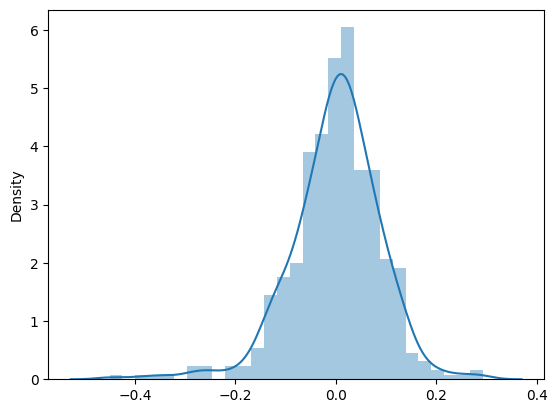

In [562]:
res = y_train - y_train_pred
sns.distplot(res)

## Step 5. Predictions and evaluation on the test set

In [563]:
# create a list of numeric vars
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_LightSnowLightRain,weathersit_MistyCloudy,yr,holiday,workingday,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.741471,0.314298,0.537414,0.569029


In [564]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_LightSnowLightRain,weathersit_MistyCloudy,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.100000,0.027273,0.318182,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.300684,0.163248,0.466833,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


In [565]:
df_test.shape

(220, 29)

In [566]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(510, 28)
(510,)
(220, 28)
(220,)


In [567]:
# X_train, y_train
y_test = df_test.pop('cnt')
X_test = df_test

In [568]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(510, 28)
(510,)
(220, 28)
(220,)


In [569]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnowLightRain,weathersit_MistyCloudy,yr,holiday,workingday,atemp,hum,windspeed
184,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0.769660,0.657364,0.084219
535,1.0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0.842587,0.610133,0.153728
299,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.496145,0.837699,0.334206
221,1.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0.795343,0.437098,0.339570
152,1.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.741471,0.314298,0.537414


In [570]:
X_test_sm = X_test_sm.drop(['mnth_Mar','mnth_Oct','mnth_Jul','weekday_Wednesday','weekday_Thrusday','holiday','weekday_Sunday','weekday_Tuesday','weekday_Monday','mnth_Jun','mnth_May','season_Spring','hum'], axis=1)

In [571]:
X_test_sm.shape

(220, 16)

In [572]:
# make predictions
y_test_pred = lr_model.predict(X_test_sm)

In [573]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8118024234712619